# CAN WE EFFICIENTLY PREDICT CREDIT CARD FRAUD?

Capstone 2 Modeling

Introduction

Problem Identification

Data

Processing the Data

EDA

Modeling

Conclusions



# INTRODUCTION & PROBLEM IDENTIFICATION
    
    Per The Washington Post, "data shows fraud losses in Europe increased 6.2 percent to $2.1 billion in 2013".  
    The reality is that credit card thieves and fraudsters are hard to catch.  For those that are caught they don't usually have the funds necessary to pay back the costs that they have incurred. 

    Can we help prevent fraud with predictive modelling for credit card fraud detection using data analytics?
    In this capstone, we will attempt to create such model.

# DATA & PROCESSING THE DATA

Dataset is from Kaggle with European dataset from 2013.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)








#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation





# lgb iterations
MAX_ROUNDS = 1000 
# lgb early stop 
EARLY_STOP = 50 
# To be adjusted based on best validation rounds
OPT_ROUNDS = 1000  
# Print out metric result
VERBOSE_EVAL = 50

IS_LOCAL = False

import os


In [2]:
# READ THE DATA
df = pd.read_csv("creditcard.csv")

In [3]:
# Let's get info on the data
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

From df.head() we learn that the Features are listed as V1, V2, etc.
Features V1, V2, etc., where transformed for protection of data through PCA components. 

The exception are:

    Feature Time which contains seconds between each transaction and the first transaction in the dataset

    Feature Amount which is the transaction amount
    
    Feature Class as the response variable set as 0 = No Fraud and 1 = Fraud

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time- count = 284,807

Time- max = 172792

Dataset contains 284,807 transactions over the course of 172792 seconds, which translates to 2 days.

Let's see if there is any missing data.


In [8]:
df[['Amount', 'Time', 'Class']].describe()


,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [9]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

It appears dataset has no missing data.

The dataset shows that there are more 0 = No fraud transactions than 1 = Fraud transactions.
The data is also unbalanced as there are over 250,000 not fraud transactions compared to the small amount of fraud.

Let's explore the dataset for percentage of total transactions that ARE NOT Fraud 'Class' 0 and percentage of total transactions that ARE fraud 'Class' 1.

# EXPLORATORY DATA ANALYSIS


In [12]:
# Percentage of total transactions that ARE NOT Fraud 'Class' = 0

nfcount = 0
not_fraud = df['Class']
for i in range(len(not_fraud)):
    if not_fraud[i]==0:
        nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(not_fraud))*100
print('Percentage of total transactions that ARE NOT Fraud: ',per_nf)

Percentage of total transactions that ARE NOT Fraud:  99.82725143693798


In [13]:
# Percentage of total transactions that ARE Fraud 'Class' = 1

fcount = 0
fraud = df['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        fcount=fcount+1

fcount
per_f=(fcount/len(not_fraud))*100
print('Percentage of total transactions that ARE Fraud: ',per_f)

Percentage of total transactions that ARE Fraud:  0.1727485630620034


Seems we hae a small amount of fraud transactions.  
NOT Fraud transactions = 99.83%
Fraud Transactions = 0.17%

<AxesSubplot:title={'center':'Bar Plot for FRAUD VS NOT FRAUD Transactions'}, xlabel='Class', ylabel='Class'>

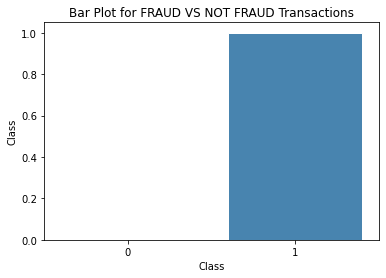

In [14]:
# Let's explore the Feature Class 0 and 1
#https://www.geeksforgeeks.org/seaborn-color-palette/
#https://seaborn.pydata.org/generated/seaborn.countplot.html

plt.title('Bar Plot for FRAUD VS NOT FRAUD Transactions')
sns.barplot(x = fraud, y = not_fraud, data = df, palette='Blues', edgecolor='w')

Let's explore the relationship between Amount and Time.

Text(0.5, 1.0, 'Time VS Amount')

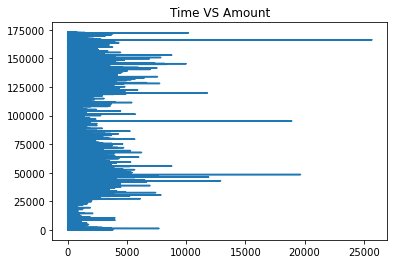

In [15]:
x=df['Amount']
y=df['Time']
plt.plot(x, y)
plt.title('Time VS Amount')

Let's explore the distribution of 'Amount'.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

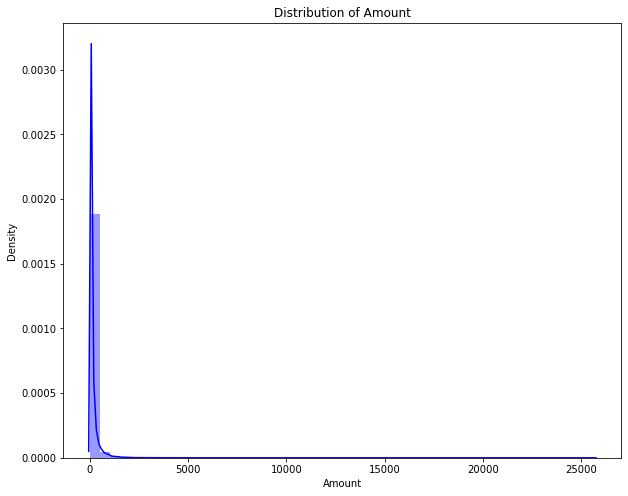

In [16]:
plt.figure(figsize=(10,8), )
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')

The distribution show that the number of high transactions are a low. 
We can say that the probability is high for fraud when transaction amount is high in amount spent.

Let's look at a scatterplot and identify any outliers.

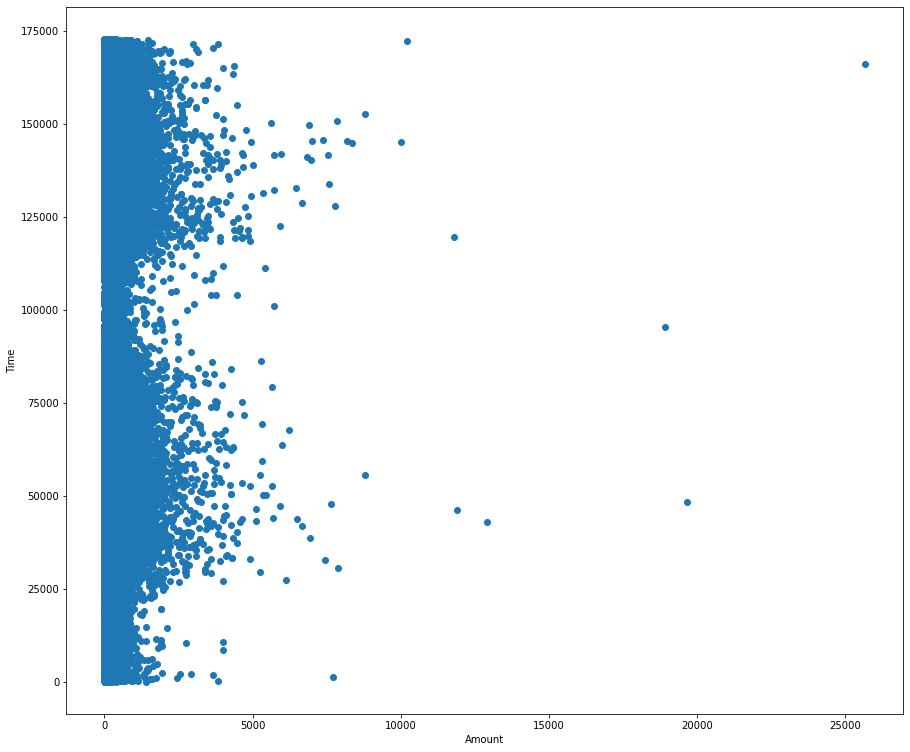

In [17]:
fig, ax = plt.subplots(figsize=(15,13))
ax.scatter(df['Amount'], df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

In [18]:
single_array = np.array([7,8,9])
multi_dimensional = np.array([(8,9,10), (11,12,13)])
reshape_array=multi_dimensional.reshape(3,2)

for i in single_array:
    print(i)


7
8
9


Let's do a correlation matrix to help understand the core relation between attributes.

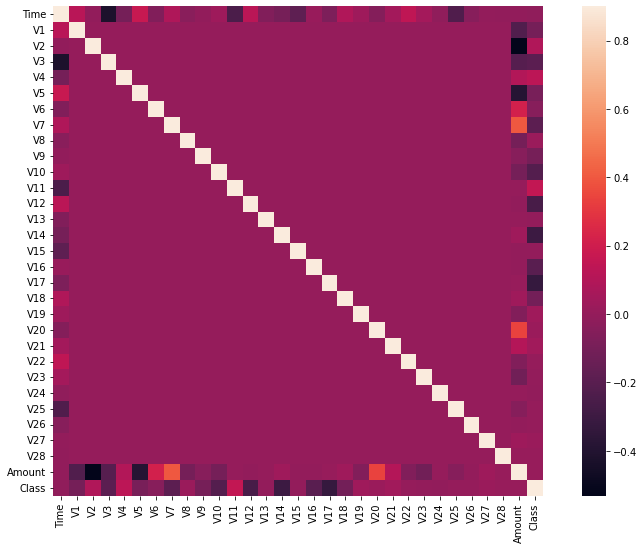

In [19]:
correlation_metrics = df.corr()
fig = plt.figure(figsize= (14, 9))
sns.heatmap(correlation_metrics, vmax=.9, square=True)
plt.show()

There are no correlations worth mentioning between Variables V1 to V28.

There is a certain correlation between some of the Features and 'Time':
    Inverse relationship with V3

There is a certain correlation between some of the Features and 'Amount':
    Direct correlation with V7 and V20
    Inverse relationship with V2 and V5

In [20]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [21]:
df = pd.read_csv("creditcard.csv")

The Credit Card Transactions Time Density Plot tells us the following:

In comparison to the Not Fraud transactions, the Fraud transactions are more evenly distributed in time the the lowest transaction times happening at night in European time zone.


# MODELING
PREDICTIVE MODELS


Let's define the predictor features and the target features.

Split Data into Train, Test and Validation Set

80% - of the data will use the train model

20% to validate the model

RANDOM FOREST CLASSIFIER MODEL

Let's set the parameters and run the model using the training set for training the data.
Then I will use the validation set for validation.


Validation Criterion:  GINI

GINI = 2 * (AUC) - 1

AUC = the receiver operating characteristic - Area Under Curve aka (ROC - AUC)

num of estimators = 100

num of paralell jobs = 4

In [22]:
# metric used for RandomForrestClassifier
RFC_METRIC = 'gini'  
# number of estimators used for RandomForrestClassifier
NUM_ESTIMATORS = 100 
#number of parallel jobs used for RandomForrestClassifier
NO_JOBS = 4 


RANDOM_STATE = 42

In [23]:
#TRAIN/VALIDATION/TEST SPLIT 80/20
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split


In [24]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [25]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [26]:
# initializing Random Classifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [27]:
# train and fit
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [28]:
# predict the target values for the valid_df 
preds = clf.predict(valid_df[predictors])

Let's visualize the features to determine highest importance

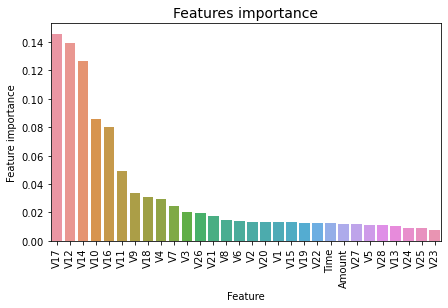

In [29]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


We can see that V17, V12, V14, V10, V16 and V11 are the most important features.

Let's visualize a confusion matrix from the model we just ran.

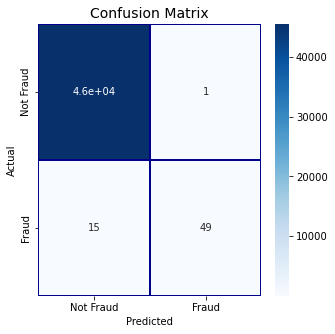

In [30]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/tutorial/color_palettes.html
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

This dataset is unbalanced therefore a confusion matrix is not a good tool to represent.

ROC-AUC

In [31]:
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

The ROC-AUC score with RandomForrestClassifier is 0.88.

Let's try Ada Boost Classifier

In [32]:
# set parameters
# https://medium.datadriveninvestor.com/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [33]:
# fit the model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [34]:
# predict target values
preds = clf.predict(valid_df[predictors])

Let's see what features are important.

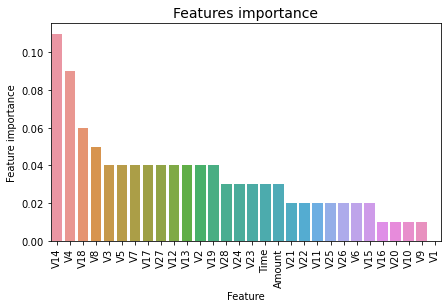

In [35]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

We see that V14, V4, V18, V8 are important features.

Let's visualize a confusion matrix.

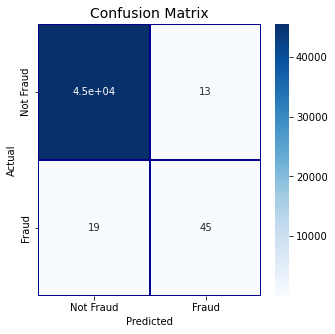

In [36]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

ROC-AUC

In [37]:
roc_auc_score(valid_df[target].values, preds)

0.851419658554005

The ROC-AUC with AdaBoostClassifier is 0.85.

CatBoostClassifier

In [38]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [39]:
# fit
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 403ms	remaining: 3m 20s
50:	total: 13.9s	remaining: 2m 2s
100:	total: 27s	remaining: 1m 46s
150:	total: 39.7s	remaining: 1m 31s
200:	total: 52.3s	remaining: 1m 17s
250:	total: 1m 4s	remaining: 1m 4s
300:	total: 1m 18s	remaining: 51.7s
350:	total: 1m 32s	remaining: 39.3s
400:	total: 1m 45s	remaining: 26.1s
450:	total: 1m 59s	remaining: 13s
499:	total: 2m 12s	remaining: 0us


In [40]:
# predict target values
preds = clf.predict(valid_df[predictors])

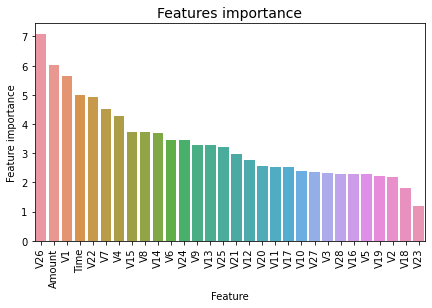

In [41]:
# features importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

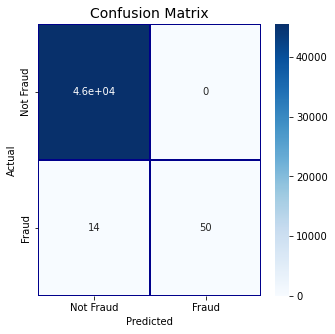

In [42]:
#confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [43]:
# ROC-AUC
roc_auc_score(valid_df[target].values, preds)

0.890625

The ROC-AUC -AUC score with CatBoostClassifier is 0.89.

XGBoost

In [44]:
# Prepare the train, valid and test
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

# Will monitor dtrain and dvalid
monitorlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [45]:
# Train the model
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                monitorlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[13:10:45] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88912	valid-auc:0.83565
[50]	train-auc:0.91944	valid-auc:0.92947
[85]	train-auc:0.92222	valid-auc:0.92925


The best validation score ROC-AUC was 0.92947, for round 50.

Feature importance with XGBoost

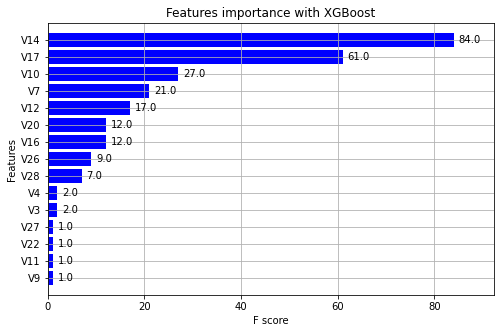

In [46]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance with XGBoost", ax=ax, color="blue") 
plt.show()

In [47]:
# Using trained model to predict target value
preds = model.predict(dtest)

ROC-AUC

In [48]:
roc_auc_score(test_df[target].values, preds)

0.9331982933860095

The AUC prediction score for the test set is 0.933.

LightGBM

In [49]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # Recommended to set small
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # recommended because training data is extremely unbalanced 
         }

In [50]:
# Prepare the model creating dataset data structures from train and validation set
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [51]:
# Using train 
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning:

'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026371 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.987274	valid's auc: 0.894282
[100]	train's auc: 0.987737	valid's auc: 0.85291
Early stopping, best iteration is:
[1]	train's auc: 0.948018	valid's auc: 0.928341


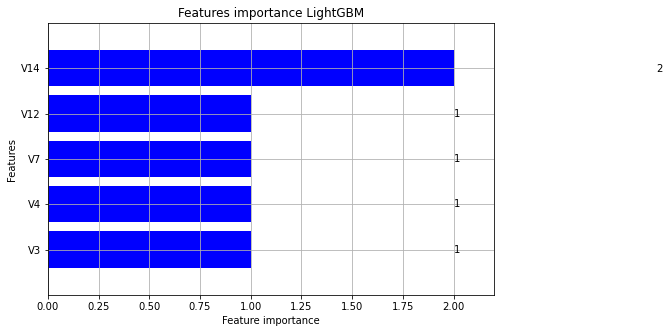

In [52]:
# Features Importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance LightGBM", ax=ax,color="blue") 
plt.show()

In [53]:
# Predict test data
preds = model.predict(test_df[predictors])

In [54]:
#ROC-AUC
roc_auc_score(test_df[target].values, preds)

0.9319442271140308

The ROC-AUC score obtained for the test set is 0.932.

Cross-Validation

Using cross-validation:
KFolds with 5 folds. 

Data is divided in 5 folds and training using 4 folds (n-1) and validateing using the 5th (nth) fold.

Test set is calculated as an average of the predictions.

In [55]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)  

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.976594	valid_1's auc: 0.968832
[100]	training's auc: 0.976563	valid_1's auc: 0.964454
Fold  1 AUC : 0.969086


/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.976122	valid_1's auc: 0.978272
Fold  2 AUC : 0.981821


/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.977417	valid_1's auc: 0.959095
[100]	training's auc: 0.980096	valid_1's auc: 0.964505
[150]	training's auc: 0.980945	valid_1's auc: 0.96327
Fold  3 AUC : 0.965175


/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.97047	valid_1's auc: 0.967831
[100]	training's auc: 0.974151	valid_1's auc: 0.973079
[150]	training's auc: 0.975965	valid_1's auc: 0.976234
[200]	training's auc: 0.977225	valid_1's auc: 0.977076
[250]	training's auc: 0.978602	valid_1's auc: 0.97777
[300]	training's auc: 0.979689	valid_1's auc: 0.97784
[350]	training's auc: 0.980191	valid_1's auc: 0.977701
Fold  4 AUC : 0.978066


/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/Users/janisnavarro/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.973529	valid_1's auc: 0.983562
[100]	training's auc: 0.974274	valid_1's auc: 0.982473
Fold  5 AUC : 0.984665
Full AUC score 0.953624


In [56]:
# Test prediction from the average predictions for test over 5 folds
pred = test_preds

# CONCLUSION

    I reviewed the data and processed for summary statistics, null values, found dataset to be unbalanced as the Not fraud transactions outnumbered the Fraudulent by a large margin.

    I visualized the features to understand the relationship amongst the available features.

    I processed two predictive models.

    I split the data as train, test and validation. For some models I only used train and test.

    Models when predicting the target for the test set:
    RandomForrestClassifier- received an AUC score of 0.88 

    AdaBoostClassifier- received an AUC score of 0.85. Lower than RandomForrestClassifier.

    Trained 500 iterations with CatBoostClassifier- received an AUC score of 0.89. The highest score.

    I then experimented with XGBoost.
        Used the validation set for validation of the training model. 
        The best validation score obtained was 0.923. 
        Then I used the model with the best training step, to predict target value from the test data; the AUC score obtained was 0.933.

    I lastly presented the data to a LightGBM model.
        Using both train-validation split and cross-validation to evaluate the model effectiveness to predict 'Class' value for detecting if a transaction is fraudulent.
        The first method obtained an AUC for the validation set of around 0.93
        For the test set AUC of 0.93
        With the cross-validation the AUC score for the test prediction of 0.95.


References

Kaggle Dataset:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Washington Post Article:
https://www.washingtonpost.com/news/morning-mix/wp/2014/08/14/united-states-is-the-champion-of-credit-card-fraud-but-europe-is-catching-up/

RandomForestClassifier:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

CatBoost:
https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier
https://stackoverflow.com/questions/55440566/print-catboost-hyperparameters

Understanding Adaboost and Scikit-learn’s algorithm Article:
https://medium.datadriveninvestor.com/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10

LightGMB:
https://github.com/microsoft/LightGBM/commit/5631366175f68a28bd174982cca16975f7fb48af
https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf